## 1. Load Data
---

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../Data/Bank_Customer_Churn_Data.csv')
df.head()

customer_id  credit_score country  gender  age  tenure    balance  \
0     15634602           619  France  Female   42       2       0.00   
1     15647311           608   Spain  Female   41       1   83807.86   
2     15619304           502  France  Female   42       8  159660.80   
3     15701354           699  France  Female   39       1       0.00   
4     15737888           850   Spain  Female   43       2  125510.82   

   products_number  credit_card  active_member  estimated_salary  churn  
0                1            1              1         101348.88      1  
1                1            0              1         112542.58      0  
2                3            1              0         113931.57      1  
3                2            0              0          93826.63      0  
4                1            1              1          79084.10      0

In [3]:
df_train = pd.read_csv('../Data/df_train.csv')
df_train.head()

customer_id  credit_score  country  gender  age  tenure    balance  \
0     15601116           686   France    Male   32       6       0.00   
1     15766374           632  Germany    Male   42       4  119624.60   
2     15716994           559    Spain    Male   24       3  114739.92   
3     15730759           561   France  Female   27       9  135637.00   
4     15797900           517   France    Male   56       9  142147.32   

   products_number  credit_card  active_member  estimated_salary  churn  
0                2            1              1         179093.26      0  
1                2            1              1         195978.86      0  
2                1            1              0          85891.02      1  
3                1            1              0         153080.40      1  
4                1            0              0          39488.04      1

In [4]:
df_test = pd.read_csv('../Data/df_test.csv')
df_test.head()

customer_id  credit_score  country  gender  age  tenure    balance  \
0     15687492           596  Germany    Male   32       3   96709.07   
1     15736963           623   France    Male   43       1       0.00   
2     15721730           601    Spain  Female   44       4       0.00   
3     15762134           506  Germany    Male   59       8  119152.10   
4     15648898           560    Spain  Female   27       7  124995.98   

   products_number  credit_card  active_member  estimated_salary  churn  
0                2            0              0          41788.37      0  
1                2            1              1         146379.30      0  
2                2            1              0          58561.31      0  
3                2            1              1         170679.74      0  
4                1            1              1         114669.79      0

In [5]:
import sklearn

In [6]:
sklearn.__version__

'1.0.2'

### Apply Encoder

In [7]:
# Apply OrdinalEncoder to 'country'

from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder(categories=[['France', 'Spain', 'Germany']],
                     handle_unknown='use_encoded_value',unknown_value = -1)
df[['country']] = enc.fit_transform(df[['country']])

In [8]:
# Apply OneHotEncoder to 'gender'
# Male = 1
# Female = 0

from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown='ignore',drop='first')
df['gender'] = ohe.fit_transform(df[['gender']].to_numpy().reshape(-1, 1)).toarray()

### Create New Features

In [9]:
df['country*estimated_salary'] = df['country'] * df['estimated_salary']

In [10]:
df['country*balance'] = df['country'] * df['balance']

### Drop Non-Churn Clients

In [11]:
df_churn = df[df['churn'] == 1]

In [12]:
df_churn

customer_id  credit_score  country  gender  age  tenure    balance  \
0        15634602           619      0.0     0.0   42       2       0.00   
2        15619304           502      0.0     0.0   42       8  159660.80   
5        15574012           645      1.0     1.0   44       8  113755.78   
7        15656148           376      2.0     0.0   29       4  115046.74   
16       15737452           653      2.0     1.0   58       1  132602.88   
...           ...           ...      ...     ...  ...     ...        ...   
9981     15672754           498      2.0     1.0   42       3  152039.70   
9982     15768163           655      2.0     0.0   46       7  137145.12   
9991     15769959           597      0.0     0.0   53       4   88381.21   
9997     15584532           709      0.0     0.0   36       7       0.00   
9998     15682355           772      2.0     1.0   42       3   75075.31   

      products_number  credit_card  active_member  estimated_salary  churn  \
0                   1            1              1         101348.88      1   
2                   3            1              0         113931.57      1   
5                   2            1              0         149756.71      1   
7                   4            1              0         119346.88      1   
16                  1            1              0           5097.67      1   
...               ...          ...            ...               ...    ...   
9981                1            1              1          53445.17      1   
9982                1            1              0         115146.40      1   
9991                1            1              0          69384.71      1   
9997                1            0              1          42085.58      1   
9998                2            1              0          92888.52      1   

      country*estimated_salary  country*balance  
0                         0.00             0.00  
2                         0.00             0.00  
5                    149756.71        113755.78  
7                    238693.76        230093.48  
16                    10195.34        265205.76  
...                        ...              ...  
9981                 106890.34        304079.40  
9982                 230292.80        274290.24  
9991                      0.00             0.00  
9997                      0.00             0.00  
9998                 185777.04        150150.62  

[2037 rows x 14 columns]

### Define X and y

In [13]:
X = df_churn[['estimated_salary', 'balance', 'age','credit_score', 'country*balance','products_number','gender']]
y = df_churn['churn']
cust_id=df_churn['customer_id']

### Apply Scaler

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
ss = StandardScaler()
X_ss = ss.fit_transform(X)

## 2. KMean
---

### Choosing K

In [16]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

**Elbow Curve**

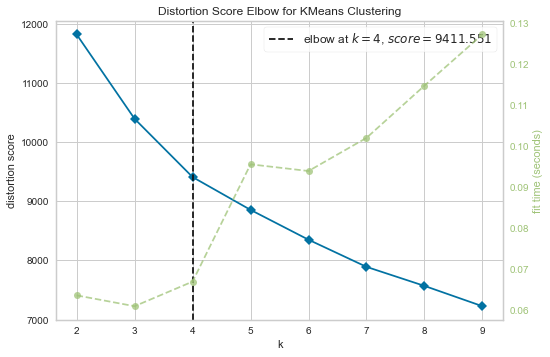

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [17]:
# Instantiate the clustering model and visualizer
km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(2,10))

visualizer.fit(X_ss)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

**Silhouette**

In [18]:
from yellowbrick.cluster import SilhouetteVisualizer

In [19]:
from sklearn.metrics import silhouette_score

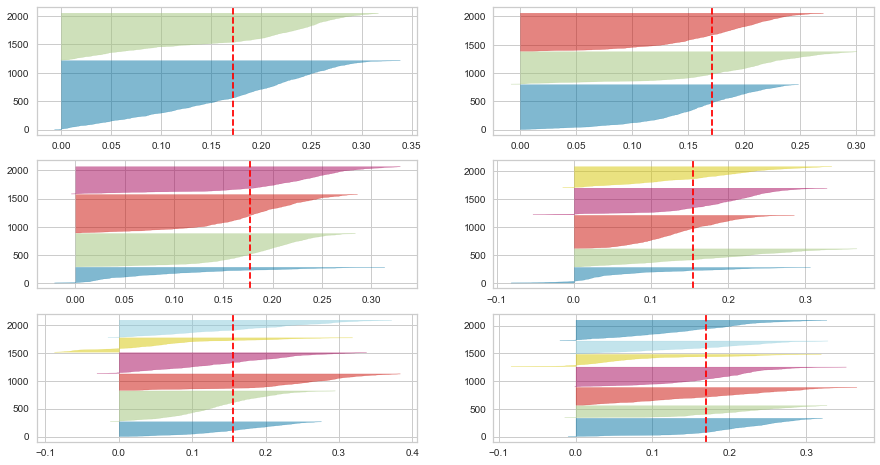

In [20]:
fig, ax = plt.subplots(3, 2, figsize=(15,8))
for i in [2, 3, 4, 5, 6,7]:
    '''
    Create KMeans instances for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X_ss) 

All Ks have clusters with Silhouette score more than the average score of the dataset.

Only K=2 has a more evenly spread-out clusters compare to K=4.

Hence, we will instantiate both k=2 and K=4 to see which give better defined clusters.

### Instantiate K=4

In [21]:
from sklearn.datasets import make_blobs

In [22]:
km = KMeans(n_clusters=4, random_state=42)
km.fit(X_ss)

KMeans(n_clusters=4, random_state=42)

In [23]:
km.predict(X_ss)

array([3, 0, 1, ..., 2, 3, 1])

In [24]:
# Option 1: Class attribute
km.labels_

array([3, 0, 1, ..., 2, 3, 1])

In [25]:
silhouette_score(X_ss, km.labels_)

0.17728282482393087

In [26]:
X['cluster'] = km.labels_
X.head()

C:\Users\ng_li\AppData\Local\Temp\ipykernel_12768\2241761331.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['cluster'] = km.labels_


estimated_salary    balance  age  credit_score  country*balance  \
0          101348.88       0.00   42           619             0.00   
2          113931.57  159660.80   42           502             0.00   
5          149756.71  113755.78   44           645        113755.78   
7          119346.88  115046.74   29           376        230093.48   
16           5097.67  132602.88   58           653        265205.76   

    products_number  gender  cluster  
0                 1     0.0        3  
2                 3     0.0        0  
5                 2     1.0        1  
7                 4     0.0        0  
16                1     1.0        1

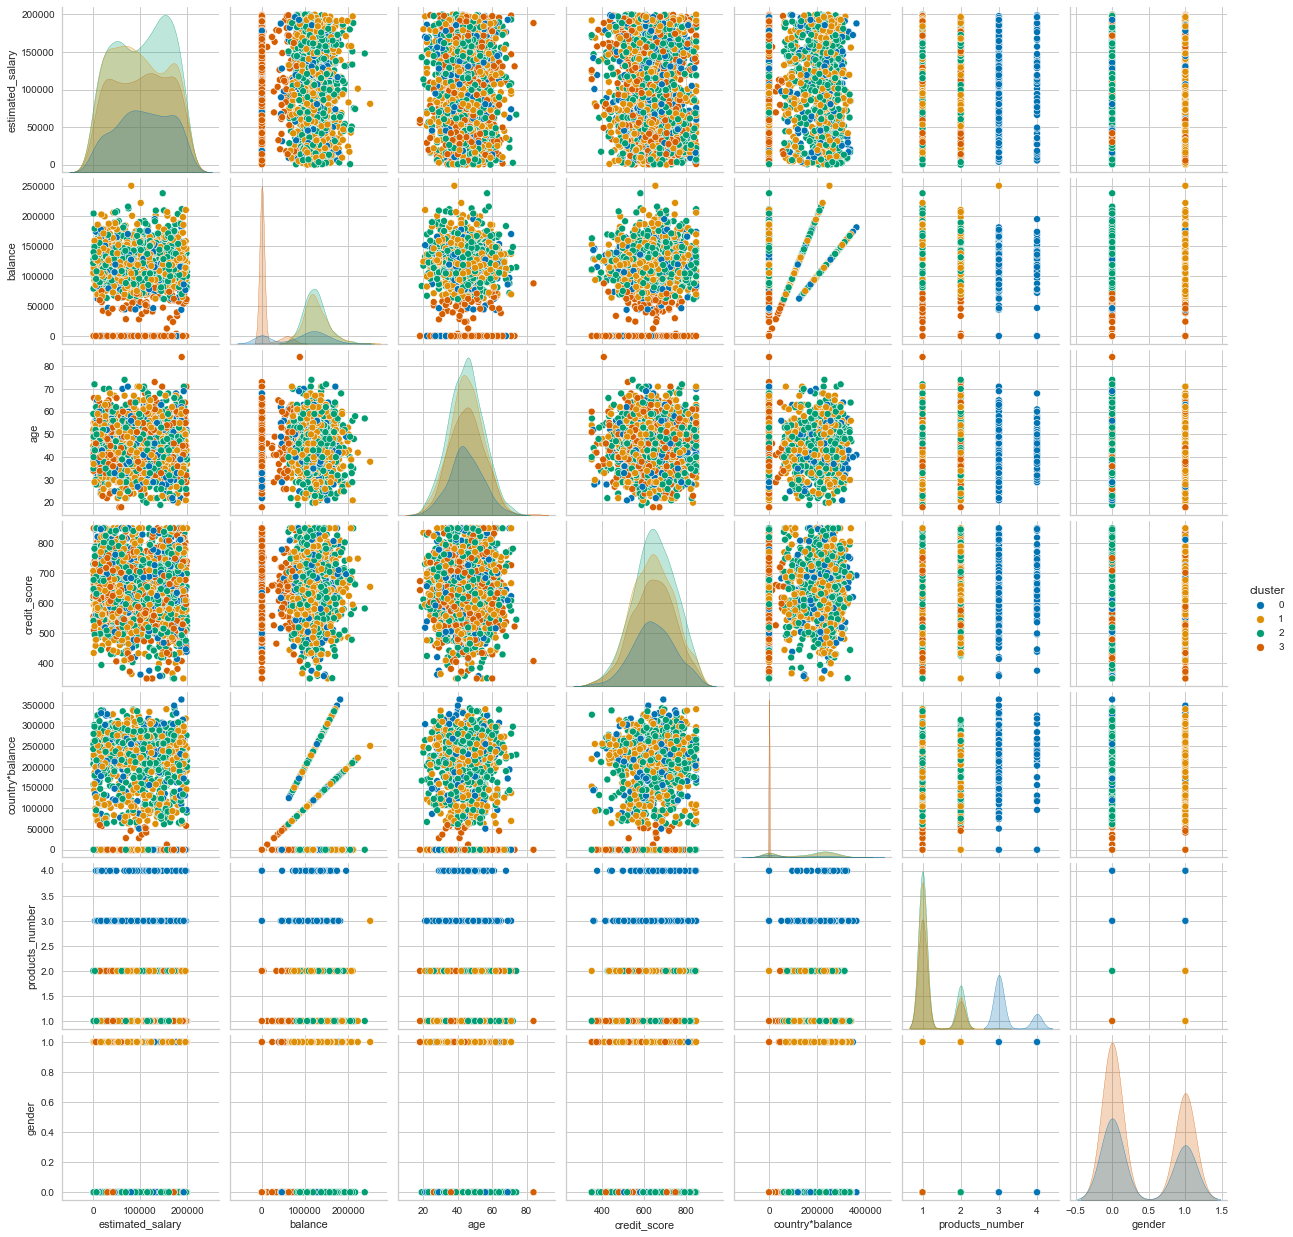

In [27]:
sns.pairplot(X, hue='cluster',palette='colorblind')

### Analyzing the Clusters

In [28]:
import atoti as tt

Welcome to atoti 0.7.2!

By using this community edition, you agree with the license available at https://docs.atoti.io/latest/eula.html.
Browse the official documentation at https://docs.atoti.io.
Join the community at https://www.atoti.io/register.

atoti collects telemetry data, which is used to help understand how to improve the product.
If you don't wish to send usage data, set the ATOTI_DISABLE_TELEMETRY environment variable to True.

You can hide this message by setting the ATOTI_HIDE_EULA_MESSAGE environment variable to True.


In [29]:
X.columns

Index(['estimated_salary', 'balance', 'age', 'credit_score', 'country*balance',
       'products_number', 'gender', 'cluster'],
      dtype='object')

In [30]:
k4 = pd.concat([cust_id, X], axis = 1)

In [31]:
k4.columns

Index(['customer_id', 'estimated_salary', 'balance', 'age', 'credit_score',
       'country*balance', 'products_number', 'gender', 'cluster'],
      dtype='object')

In [32]:
k4.to_csv('../Data/k4.csv', index=False)

In [33]:
session = tt.Session()

In [34]:
k4 = session.read_csv('../Data/k4.csv', keys=["customer_id","cluster"])

In [35]:
cube = session.create_cube(k4)

In [36]:
h = cube.hierarchies
h

{('K4', 'customer_id'): <atoti.hierarchy.Hierarchy object at 0x00000182182A4160>, ('K4', 'cluster'): <atoti.hierarchy.Hierarchy object at 0x00000182182A4190>}

In [37]:
l = cube.levels
l

In [38]:
m = cube.measures
m

{'contributors.COUNT': <atoti.measure.Measure object at 0x000001821832B370>, 'update.TIMESTAMP': <atoti.measure.Measure object at 0x00000182183369A0>, 'age.SUM': <atoti.measure.Measure object at 0x00000182183365B0>, 'age.MEAN': <atoti.measure.Measure object at 0x0000018218336520>, 'country*balance.SUM': <atoti.measure.Measure object at 0x00000182183364C0>, 'country*balance.MEAN': <atoti.measure.Measure object at 0x0000018218336490>, 'products_number.SUM': <atoti.measure.Measure object at 0x0000018218336E20>, 'products_number.MEAN': <atoti.measure.Measure object at 0x0000018218336E50>, 'gender.SUM': <atoti.measure.Measure object at 0x0000018218336E80>, 'gender.MEAN': <atoti.measure.Measure object at 0x0000018218336EB0>, 'estimated_salary.SUM': <atoti.measure.Measure object at 0x0000018218336EE0>, 'estimated_salary.MEAN': <atoti.measure.Measure object at 0x0000018218336F10>, 'credit_score.SUM': <atoti.measure.Measure object at 0x0000018218336F40>, 'credit_score.MEAN': <atoti.measure.Measure object at 0x0000018218336F70>, 'balance.SUM': <atoti.measure.Measure object at 0x0000018218336FA0>, 'balance.MEAN': <atoti.measure.Measure object at 0x0000018218336FD0>}

In [39]:
session.visualize()

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

In [40]:
session.visualize()

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

In [41]:
session.visualize()

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

In [42]:
session.visualize()

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

In [43]:
session.visualize()

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

In [44]:
session.visualize()

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

In [45]:
X.groupby(['cluster','gender'])['gender'].count()

cluster  gender
0        0.0       167
         1.0       112
1        1.0       590
2        0.0       683
3        0.0       289
         1.0       196
Name: gender, dtype: int64

In [46]:
pd.set_option('display.max_columns', 500)

In [47]:
X.groupby('cluster').describe()

estimated_salary                                                   \
                   count           mean           std      min        25%   
cluster                                                                     
0                  279.0  106435.923297  56339.118776  3440.47  64532.360   
1                  590.0   97011.077644  58132.524392    11.58  47183.885   
2                  683.0  103142.326501  57791.221503    91.75  52227.870   
3                  485.0  101664.366433  58516.001798   417.41  50695.930   

                                           balance                 \
               50%          75%        max   count           mean   
cluster                                                             
0        107155.40  155096.3400  198874.52   279.0   86956.161900   
1         93282.58  148298.1575  199693.84   590.0  124522.806831   
2        108699.59  153719.1450  199808.10   683.0  123746.058404   
3        104469.06  151648.6600  199290.68   485.0    6887.240289   

                                                                     \
                  std       min          25%        50%         75%   
cluster                                                               
0        58851.135165      0.00       0.0000  108449.23  131469.445   
1        28011.128563  62400.48  106866.1425  121261.74  140344.400   
2        27079.867374  61671.19  105553.5200  122031.55  138432.355   
3        19186.289185      0.00       0.0000       0.00       0.000   

                      age                                                     \
               max  count       mean       std   min   25%   50%   75%   max   
cluster                                                                        
0        195238.29  279.0  44.720430  9.503538  21.0  39.0  44.0  51.0  71.0   
1        250898.09  590.0  44.808475  9.552585  20.0  38.0  45.0  51.0  71.0   
2        238387.56  683.0  44.721816  9.976008  19.0  38.0  45.0  51.0  74.0   
3         87873.39  485.0  45.105155  9.878355  18.0  38.0  45.0  52.0  84.0   

        credit_score                                                       \
               count        mean         std    min    25%    50%     75%   
cluster                                                                     
0              279.0  645.641577   99.248474  358.0  581.5  645.0  710.50   
1              590.0  643.016949  100.793219  350.0  572.0  640.5  715.75   
2              683.0  649.206442  100.071982  350.0  584.0  649.0  720.50   
3              485.0  642.595876  100.844049  350.0  569.0  646.0  714.00   

               country*balance                                          \
           max           count           mean            std  min  25%   
cluster                                                                  
0        850.0           279.0  108907.298065  118988.953159  0.0  0.0   
1        850.0           590.0  150108.458254  110501.587037  0.0  0.0   
2        850.0           683.0  155732.779151  108973.527441  0.0  0.0   
3        850.0           485.0    1198.414289    7585.551213  0.0  0.0   

                                         products_number                      \
               50%        75%        max           count      mean       std   
cluster                                                                        
0             0.00  227551.18  362922.96           279.0  3.215054  0.411598   
1        197360.44  242236.19  339487.66           590.0  1.179661  0.388624   
2        196346.04  244419.29  341871.88           683.0  1.215227  0.411281   
3             0.00       0.00   59877.33           485.0  1.200000  0.400413   

                                 gender                                     \
         min  25%  50%  75%  max  count      mean       std  min  25%  50%   
cluster                                                                      
0        3.0  3.0  3.0  3.0  4.0  279.0  0.401434  0.491069  0.0  0.0  

Cluster 0 (Middle-class): Less than 200k balance, average balance of less than 100k, minimum 3 products

Cluster 1 (Familyman): Male, minimum balance of 60k, average balance more than 100k, holds at least 1 product and max 3 products

Cluster 2 (Working women): Females, minimum balance of 60k, average balance more than 100k, holds at least 1 product and max 2 products

Cluster 3 (Spenders): Less than 100k balance, average balance of less than 10k, holds at least 1 product and max 2 products

## 3. Try K=2
---

### Define X and y

In [48]:
X1 = df_churn[['estimated_salary', 'balance', 'age','credit_score', 'country*balance','products_number','gender']]
y1 = df_churn['churn']

### Apply Scaler

In [49]:
ss = StandardScaler()
X1_ss = ss.fit_transform(X1)

### Instantiate K=2

In [50]:
km = KMeans(n_clusters=2, random_state=42)
km.fit(X1_ss)

KMeans(n_clusters=2, random_state=42)

In [51]:
km.predict(X1_ss)

array([1, 0, 0, ..., 1, 1, 0])

In [52]:
silhouette_score(X1_ss, km.labels_)

0.17152843518793728

In [53]:
# Option 1: Class attribute
km.labels_

array([1, 0, 0, ..., 1, 1, 0])

In [54]:
X1['cluster'] = km.labels_
X1.head()

C:\Users\ng_li\AppData\Local\Temp\ipykernel_12768\1819682029.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X1['cluster'] = km.labels_


estimated_salary    balance  age  credit_score  country*balance  \
0          101348.88       0.00   42           619             0.00   
2          113931.57  159660.80   42           502             0.00   
5          149756.71  113755.78   44           645        113755.78   
7          119346.88  115046.74   29           376        230093.48   
16           5097.67  132602.88   58           653        265205.76   

    products_number  gender  cluster  
0                 1     0.0        1  
2                 3     0.0        0  
5                 2     1.0        0  
7                 4     0.0        0  
16                1     1.0        0

In [55]:
X1.groupby('cluster').median()

estimated_salary    balance   age  credit_score  country*balance  \
cluster                                                                     
0              100851.475  125979.48  44.0         647.0        215875.47   
1              106340.660       0.00  46.0         644.0             0.00   

         products_number  gender  
cluster                           
0                    1.0     0.0  
1                    1.0     0.0

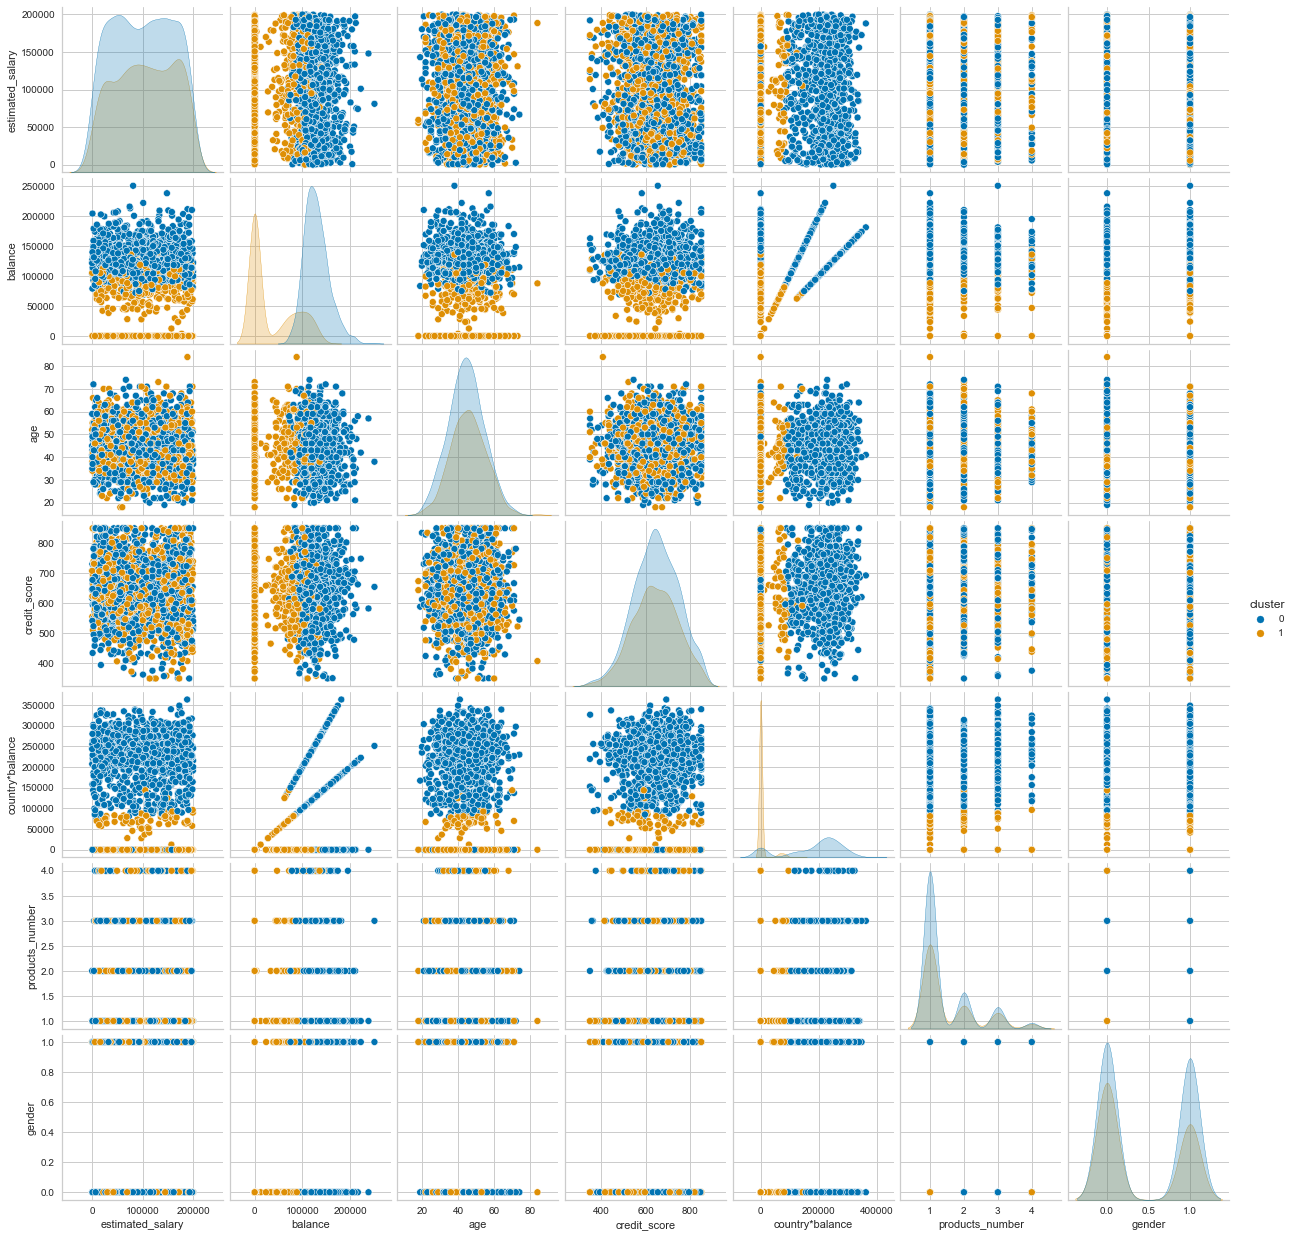

In [56]:
sns.pairplot(X1, hue='cluster',palette='colorblind')

### Analyzing the Clusters

In [57]:
k2 = pd.concat([cust_id, X1], axis = 1)

In [58]:
k2.columns

Index(['customer_id', 'estimated_salary', 'balance', 'age', 'credit_score',
       'country*balance', 'products_number', 'gender', 'cluster'],
      dtype='object')

In [59]:
k2.to_csv('../Data/k2.csv', index=False)

In [60]:
session1 = tt.Session()

Deleting existing "Unnamed" session to create the new one.


In [61]:
k2 = session1.read_csv('../Data/k2.csv', keys=["customer_id","cluster"])

In [62]:
cube1 = session1.create_cube(k2)

In [63]:
h1 = cube1.hierarchies
h1

{('K2', 'customer_id'): <atoti.hierarchy.Hierarchy object at 0x000001821CAB5820>, ('K2', 'cluster'): <atoti.hierarchy.Hierarchy object at 0x000001821CABCF70>}

In [64]:
l1 = cube1.levels

In [65]:
m1 = cube1.measures
m1

{'contributors.COUNT': <atoti.measure.Measure object at 0x000001821CAB38B0>, 'update.TIMESTAMP': <atoti.measure.Measure object at 0x000001821CAC32E0>, 'credit_score.MEAN': <atoti.measure.Measure object at 0x000001821CAC3280>, 'credit_score.SUM': <atoti.measure.Measure object at 0x000001821CAC32B0>, 'country*balance.MEAN': <atoti.measure.Measure object at 0x000001821CAC3250>, 'country*balance.SUM': <atoti.measure.Measure object at 0x000001821CAC31C0>, 'estimated_salary.MEAN': <atoti.measure.Measure object at 0x000001821CAC3190>, 'estimated_salary.SUM': <atoti.measure.Measure object at 0x000001821CAC3FA0>, 'gender.MEAN': <atoti.measure.Measure object at 0x000001821CAC3FD0>, 'gender.SUM': <atoti.measure.Measure object at 0x000001821CAC3F40>, 'balance.MEAN': <atoti.measure.Measure object at 0x000001821CAC3F70>, 'balance.SUM': <atoti.measure.Measure object at 0x000001821CAC3F10>, 'products_number.MEAN': <atoti.measure.Measure object at 0x000001821CAC3160>, 'products_number.SUM': <atoti.measure.Measure object at 0x000001821CAC3EE0>, 'age.MEAN': <atoti.measure.Measure object at 0x000001821CAC3E20>, 'age.SUM': <atoti.measure.Measure object at 0x000001821CAC3E50>}

In [66]:
session1.visualize()

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

In [67]:
session1.visualize()

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

In [68]:
session1.visualize()

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

In [69]:
session1.visualize()

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

In [70]:
session1.visualize()

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

In [71]:
session1.visualize()

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

In [72]:
session1.visualize()

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

In [73]:
X1.groupby(['cluster']).describe()

estimated_salary                                                   \
                   count           mean           std     min         25%   
cluster                                                                     
0                 1212.0   99341.659670  57978.471504   11.58  48568.1525   
1                  825.0  104586.052861  57708.611144  123.07  56999.9000   

                                           balance                 \
                50%         75%        max   count           mean   
cluster                                                             
0        100851.475  149482.775  199808.10  1212.0  128914.285446   
1        106340.660  156495.390  199378.58   825.0   35568.461418   

                                                                              \
                  std       min          25%        50%       75%        max   
cluster                                                                        
0        25992.431796  67111.65  110365.2725  125979.48  143925.7  250898.09   
1        47245.258323      0.00       0.0000       0.00   81076.8  144237.91   

            age                                                     \
          count       mean       std   min   25%   50%   75%   max   
cluster                                                              
0        1212.0  44.336634  9.782551  19.0  38.0  44.0  51.0  74.0   
1         825.0  45.574545  9.689579  18.0  39.0  46.0  52.0  84.0   

        credit_score                                                      \
               count        mean         std    min    25%    50%    75%   
cluster                                                                    
0             1212.0  647.330858   99.948138  350.0  579.0  647.0  720.0   
1              825.0  642.443636  100.857727  350.0  575.0  644.0  713.0   

               country*balance                                               \
           max           count           mean           std  min        25%   
cluster                                                                       
0        850.0          1212.0  182583.665743  98120.812686  0.0  129914.91   
1        850.0           825.0    5581.142715  20146.705230  0.0       0.00   

                                         products_number                      \
               50%        75%        max           count      mean       std   
cluster                                                                        
0        215875.47  251814.82  362922.96          1212.0  1.435644  0.771060   
1             0.00       0.00  143633.48           825.0  1.533333  0.841385   

                                  gender                                     \
         min  25%  50%  75%  max   count      mean       std  min  25%  50%   
cluster                                                                       
0        1.0  1.0  1.0  2.0  4.0  1212.0  0.473597  0.499509  0.0  0.0  0.0   
1        1.0  1.0  1.0  2.0  4.0   825.0  0.392727  0.488653  0.0  0.0  0.0   

                   
         75%  max  
cluster            
0        1.0  1.0  
1        1.0  1.0

We will use K=4 as it gives more defined clusters and slightly higher silhouette score.

## 4. Final Model
---

### Define X and y

In [74]:
X_final = df_churn[['balance', 'products_number','gender']]
y_final = df_churn['churn']
cust_id=df_churn['customer_id']

### Apply Scaler

In [75]:
ss = StandardScaler()
X_ss_final = ss.fit_transform(X_final)

**Elbow Curve**

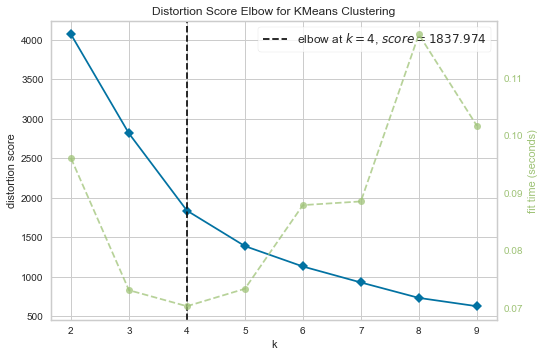

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [76]:
# Instantiate the clustering model and visualizer
km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(2,10))

visualizer.fit(X_ss_final)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

**Silhouette**

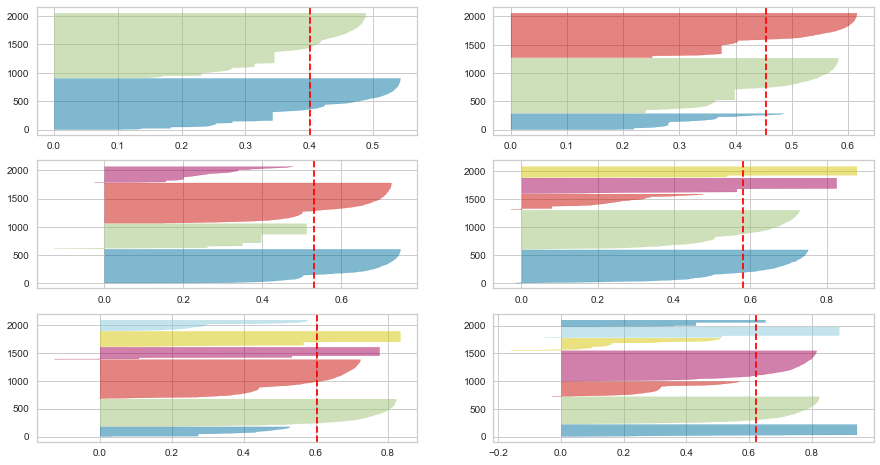

In [77]:
fig, ax = plt.subplots(3, 2, figsize=(15,8))
for i in [2, 3, 4, 5, 6,7]:
    '''
    Create KMeans instances for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X_ss_final) 

### Instantiate K=4

In [78]:
model_km = KMeans(n_clusters=4, random_state=42)
model_km.fit(X_ss_final)

KMeans(n_clusters=4, random_state=42)

In [79]:
model_km.predict(X_ss_final)

array([1, 3, 0, ..., 2, 1, 0])

In [80]:
# Option 1: Class attribute
model_km.labels_

array([1, 3, 0, ..., 2, 1, 0])

In [81]:
silhouette_score(X_ss_final, model_km.labels_)

0.5296121957583406

In [82]:
X_final['cluster'] = model_km.labels_
X_final.head()

C:\Users\ng_li\AppData\Local\Temp\ipykernel_12768\1551426625.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_final['cluster'] = model_km.labels_


balance  products_number  gender  cluster
0        0.00                1     0.0        1
2   159660.80                3     0.0        3
5   113755.78                2     1.0        0
7   115046.74                4     0.0        3
16  132602.88                1     1.0        0

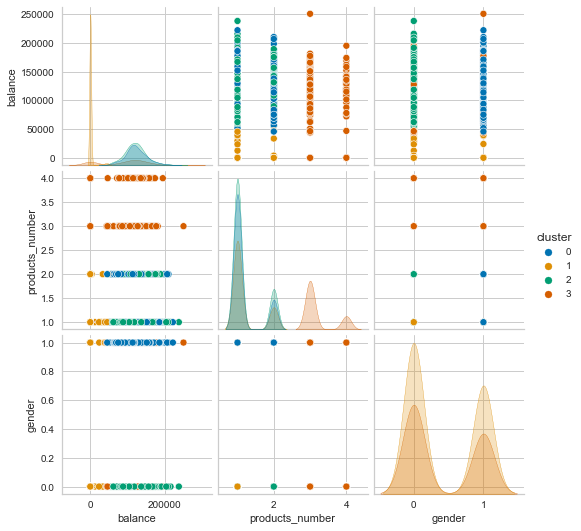

In [83]:
sns.pairplot(X_final, hue='cluster',palette='colorblind')

### Analyzing the Clusters

In [84]:
X_final.columns

Index(['balance', 'products_number', 'gender', 'cluster'], dtype='object')

In [85]:
k_final = pd.concat([cust_id, X_final], axis = 1)

In [86]:
k_final.columns

Index(['customer_id', 'balance', 'products_number', 'gender', 'cluster'], dtype='object')

In [87]:
k_final.to_csv('../Data/k_final.csv', index=False)

In [88]:
session_final = tt.Session()

Deleting existing "Unnamed" session to create the new one.


In [89]:
k_final = session_final.read_csv('../Data/k_final.csv', keys=["customer_id","cluster"])

In [90]:
cube_final = session_final.create_cube(k_final)

In [91]:
h_final = cube_final.hierarchies
h_final

{('K_final', 'cluster'): <atoti.hierarchy.Hierarchy object at 0x000001821D6F8370>, ('K_final', 'customer_id'): <atoti.hierarchy.Hierarchy object at 0x000001821D6F8550>}

In [92]:
l_final = cube_final.levels
l_final

In [93]:
m_final = cube_final.measures
m_final

{'contributors.COUNT': <atoti.measure.Measure object at 0x000001821D6F83D0>, 'update.TIMESTAMP': <atoti.measure.Measure object at 0x000001821D6F8C10>, 'gender.MEAN': <atoti.measure.Measure object at 0x000001821D6F8430>, 'gender.SUM': <atoti.measure.Measure object at 0x000001821D6F8340>, 'products_number.MEAN': <atoti.measure.Measure object at 0x000001821D6F8220>, 'products_number.SUM': <atoti.measure.Measure object at 0x000001821D6F8280>, 'balance.MEAN': <atoti.measure.Measure object at 0x000001821D6F8160>, 'balance.SUM': <atoti.measure.Measure object at 0x000001821D6F8130>}

In [94]:
session_final.visualize()

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

In [95]:
session_final.visualize()

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

In [96]:
session_final.visualize()

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

In [97]:
X_final.groupby('cluster').describe()

balance                                                     \
          count           mean           std       min         25%   
cluster                                                              
0         599.0  123241.827245  28530.359031  45752.78  105781.315   
1         445.0    1688.290000   8038.211450      0.00       0.000   
2         713.0  121322.978682  28988.874349  52831.13  103549.240   
3         280.0   87541.668786  59556.959433      0.00       0.000   

                                            products_number            \
                50%          75%        max           count      mean   
cluster                                                                 
0        120711.730  139703.5350  222267.63           599.0  1.180301   
1             0.000       0.0000   51116.26           445.0  1.200000   
2        120392.990  137648.4100  238387.56           713.0  1.211781   
3        108479.025  131589.5125  250898.09           280.0  3.214286   

                                           gender                           \
              std  min  25%  50%  75%  max  count      mean       std  min   
cluster                                                                      
0        0.384759  1.0  1.0  1.0  1.0  2.0  599.0  1.000000  0.000000  1.0   
1        0.400450  1.0  1.0  1.0  1.0  2.0  445.0  0.417978  0.493782  0.0   
2        0.408857  1.0  1.0  1.0  1.0  2.0  713.0  0.000000  0.000000  0.0   
3        0.411061  3.0  3.0  3.0  3.0  4.0  280.0  0.403571  0.491492  0.0   

                             
         25%  50%  75%  max  
cluster                      
0        1.0  1.0  1.0  1.0  
1        0.0  0.0  1.0  1.0  
2        0.0  0.0  0.0  0.0  
3        0.0  0.0  1.0  1.0

Cluster 0 (Working Males): Male, minimum 45k balance, maximum 220k balance, average balance of 120k, mostly holds only 1 product and max 2 products

Cluster 1 (Spenders): Less than 52k balance, average balance of 1.7k, mostly holds only 1 product and max 2 products

Cluster 2 (Working Women): Female, minimum balance of 52k, maximum 230k balance, average balance of 120k, mostly holds only 1 product and max 2 products

Cluster 3 (Young Singles): Average balance 87k, 25% of the group has zero balance, 50% of the group has more than 100k balance, mostly holds at least 3 product and max 4 products

### Visually verifying cluster labels

In [98]:
import plotly.express as px
import plotly.graph_objects as go

In [99]:
fig = px.scatter_3d(X_final, x='balance', y='products_number', z='gender',
              color='cluster')
fig.show()

In [100]:
def plot_cluster(i):
    cluster_i = px.scatter_3d(X_final[X_final['cluster']==i], x='balance', y='products_number', z='gender')
    cluster_i.show()

In [101]:
plot_cluster(0)

In [102]:
plot_cluster(1)

In [103]:
plot_cluster(2)

In [104]:
plot_cluster(3)

## Save the Model
---

In [105]:
import pickle

In [106]:
##save model
with open("..\App\Model\Clustering.pkl", "wb") as to_save:
     pickle.dump(model_km, to_save)

In [107]:
##save model
with open("..\App\Model\ss.pkl", "wb") as to_save:
     pickle.dump(ss, to_save)

In [108]:
##save model
with open("..\App\Model\enc.pkl", "wb") as to_save:
     pickle.dump(enc, to_save)

In [109]:
##save model
with open("..\App\Model\ohe.pkl", "wb") as to_save:
     pickle.dump(ohe, to_save)